
### 기초 통계 / ML 과제


1. 먼저  
import seaborn as sns  
iris = sns.load_dataset('iris')  
해당 코드를 실행하여 Iris 데이터셋을 불러오고 구조를 확인하시오.  
(예: head(), info() 등)


In [1]:
import seaborn as sns  
iris = sns.load_dataset('iris') 
display(iris.head())
display(iris.info())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None


2. 기술통계량 산출  
Species별 Petal Length의 평균, 표준편자, 최소값, 최대값, 사분위수 등을 출력하고 그룹별 데이터 개수를 확인하시오.


In [2]:
iris_grouped = iris.groupby('species')['petal_length']
desc = iris_grouped.describe()
print(desc)

print("\nGroup sizes:")
print(iris['species'].value_counts())

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9

Group sizes:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64



3. 시각화  
Species별 Petal Length의 분포를 Boxplot으로 시각화하시오.  
Boxplot 아래에 간단한 해석 코멘트를 다시오. (예: 어느 그룹이 평균이 높은지)


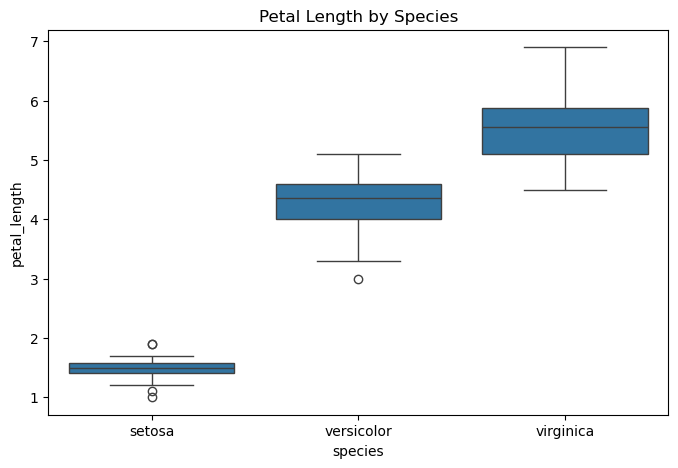

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Petal Length by Species')
plt.show()

In [4]:
# petal_length의 평균은 virginica > versicolor > setosa 이다.


4. 정규성 검정  
Species별로 Shapiro-Wilk 검정을 실시하시오.  (해당 검정에 대한 가설 수립 포함)  
각 그룹의 p-value를 출력하고, 0.05를 기준으로 해석하시오.  
(단, 이후 분석은 정규성을 만족한다고 가정한다.)  
(Hint: scipy.stats.shapiro() 함수로 활용 가능)

In [5]:
from scipy import stats

for sp in iris['species'].unique():
    stat, p = stats.shapiro(iris[iris['species'] == sp]['petal_length'])
    print(f"{sp}: p-value = {p:.4f}")

setosa: p-value = 0.0548
versicolor: p-value = 0.1585
virginica: p-value = 0.1098


In [6]:
# p > 0.05 → 각 품종의 petal_length는 통계적으로 정규분포를 따른다고 가정한다.


5. 등분산성 검정  
Levene 검정을 통해 3개 그룹 간 등분산성을 검정하시오.  
(해당 검정에 대한 가설 수립 포함)  
p-value를 출력하고, 0.05를 기준으로 해석하시오.  
(단, 이후 분석은 등분산성을 만족한다고 가정한다.)  
(Hint: scipy.stats.levene() 함수로 활용 가능)


In [7]:
setosa = iris[iris['species'] == 'setosa']['petal_length']
versicolor = iris[iris['species'] == 'versicolor']['petal_length']
virginica = iris[iris['species'] == 'virginica']['petal_length']

stat, p = stats.levene(setosa, versicolor, virginica)
print(f"Levene Test p-value = {p:.10f}")

Levene Test p-value = 0.0000000313


In [8]:
# p-value < 0.05 -> 등분산성 불만족..?


6. 가설 수립  
아래 가설을 수립하시오.  
H₀: 3개 Species 간 ~~  
H₁: 적어도 ~~


In [9]:
print("귀무가설 (H₀): 세 종(Species)의 Petal Length 평균은 모두 같다.")
print("대립가설 (H₁): 적어도 하나의 종은 평균이 다르다.")

귀무가설 (H₀): 세 종(Species)의 Petal Length 평균은 모두 같다.
대립가설 (H₁): 적어도 하나의 종은 평균이 다르다.



7. ANOVA 실행  
One-way ANOVA를 실시하시오.  
ANOVA 표를 출력하고 F값과 p-value를 확인한 후,  
유의수준 0.05 기준으로 귀무가설 기각 여부를 쓰시오.


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('petal_length ~ species', data=iris).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

            sum_sq     df            F        PR(>F)
species   437.1028    2.0  1180.161182  2.856777e-91
Residual   27.2226  147.0          NaN           NaN


In [11]:
# p-value ~=0, 귀무가설 기각 
# -> 적어도 한 품종의 petal_length 평균은 다른 품종과 통계적으로 유의미한 차이가 있음.


8. 사후검정 (Tukey HSD)  
ANOVA 결과 유의하다면 Tukey HSD 사후검정을 실시하시오.  
어떤 쌍 간에 유의미한 차이가 있는지 요약하시오.


In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=iris['petal_length'],
                          groups=iris['species'],
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------



9. 결과 요약  
Boxplot, ANOVA, 사후검정 결과를 종합하여  
어떤 그룹의 Petal Length가 통계적으로 유의하게 긴지/짧은지 간단히 결론지으시오.


In [13]:
# 모든 그룹 쌍에서 평균 차이가 통계적으로 유의미함.
# setosa-versicolor, setosa-virginica, versicolor-virginica 모두 통계적으로 유의미한 차이가 있음.
# 즉, 세 품종 간에 petal_length 평균이 모두 다르다.


### 실제 신용카드 사기 데이터셋을 활용한 분류 모델 학습



1. 데이터 로드 및 기본 탐색  
creditcard.csv를 불러오고 데이터 구조를 확인하시오.  
(예: head(), info(), describe(), Class 비율 출력)  
정상 거래와 사기 거래 건수를 확인하시오.


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns


2. 샘플링  
사기 거래(Class=1)는 전부 유지하고,  
정상 거래(Class=0)는 10,000건만 무작위 샘플링하시오.  
(sampling 진행시, random_state는 42로 설정)  
두 데이터셋을 합쳐 새로운 분석용 데이터프레임으로 만드시오.  
샘플링 후 Class 비율을 다시 출력하시오.


In [16]:
df = pd.read_csv('creditcard.csv')

print(df.shape)
display(df.head())
display(df.info())
print(df['Class'].value_counts(normalize=True))

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64



3. 데이터 전처리  
Amount 변수만 표준화(StandardScaler) 하여  
새로운 변수 Amount_Scaled로 대체하시오.  
Amount 원본 변수는 제거하시오.  
그리고 X, y로 데이터프레임을 분리하시오.



4. 학습 데이터와 테스트 데이터 분할  
train_test_split을 사용해 학습셋:테스트셋 비율을 8:2로 나누고,  
stratify=y 옵션으로 클래스 비율 유지,  
분할된 데이터의 Class 비율을 출력하시오.  
(random_state는 42로 설정)


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('creditcard.csv')

fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0].sample(n=10000, random_state=42)
df_balanced = pd.concat([fraud, normal])

scaler = StandardScaler()
df_balanced['Amount_Scaled'] = scaler.fit_transform(df_balanced[['Amount']])
df_balanced.drop('Amount', axis=1, inplace=True)

X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train 데이터 클래스 비율:")
print(y_train.value_counts(normalize=True))

print("\nTest 데이터 클래스 비율:")
print(y_test.value_counts(normalize=True))


Train 데이터 클래스 비율:
Class
0    0.953056
1    0.046944
Name: proportion, dtype: float64

Test 데이터 클래스 비율:
Class
0    0.953311
1    0.046689
Name: proportion, dtype: float64



5. SMOTE 적용  
학습 데이터(X_train)에 SMOTE를 적용하여  
소수 클래스(사기 거래)를 오버샘플링하시오.  
(왜 SMOTE를 적용해야하는지까지 서술하시오.)  
SMOTE 적용 전후의 사기 거래 건수를 출력하시오.


In [18]:


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


Before SMOTE: Class
0    7999
1     394
Name: count, dtype: int64
After SMOTE: Class
0    7999
1    7999
Name: count, dtype: int64



6. 모델 학습  
적합한 ML 모델을 선정하여 모델을 학습시키고,  
테스트셋에서 예측값(predict)과 예측 확률(predict_proba)을 출력하시오.  
classification_report로 Precision, Recall, F1-score를 확인하시오.  
그리고 average_precision_score로 PR-AUC를 계산하여 출력하시오.


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score

# 1. 모델 선정 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, digits=4))

pr_auc = average_precision_score(y_test, y_prob)
print(f"PR-AUC: {pr_auc:.4f}")

              precision    recall  f1-score   support

           0     0.9945    0.9975    0.9960      2001
           1     0.9457    0.8878    0.9158        98

    accuracy                         0.9924      2099
   macro avg     0.9701    0.9426    0.9559      2099
weighted avg     0.9922    0.9924    0.9923      2099

PR-AUC: 0.9537



7. 최종 성능 평가  
모델 선정, 하이퍼파라미터 튜닝과 Threshold 조정 등을 통해  
최종 모델이 목표 Recall ≥ 0.80, F1 ≥ 0.88, PR-AUC ≥ 0.90 을 달성하였는지 여부를 작성하시오.  
(Class 0, 1 둘 다!)  
달성하지 못했다면 추가로 어떤 방법을 시도할지 간략히 제안하시오.


In [20]:
# PR-AUC 0.9537, 이외 recall ≥ 0.80, F1 ≥ 0.88
# 기준을 만족하여 목표로 제시된 성능 조건을 충족함.